In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from lsst.rsp import get_tap_service
rsp_tap = get_tap_service("tap")

In [2]:
ut1 = Table.read('byw.csv', format='csv')
ut1

<Table length=5>
BYWid shortname catWISE_RA catWISE_Dec
int64    str9    float64     float64  
----- --------- ---------- -----------
    0 0000+4437  0.0087419  44.6236809
    1 0000-7048   0.024753 -70.8142748
    2 0000-4614  0.0678658 -46.2490076
    3 0000+2454  0.0864696  24.9051138
    4 0000-4813  0.0893808 -48.2208077

In [3]:
query = """
        SELECT objectId, coord_ra, coord_dec,
        ut1.catWISE_RA AS ut1_ra, ut1.catWISE_Dec AS ut1_dec, ut1.BYWid AS ut1_objid
        FROM dp1.Object, TAP_UPLOAD.ut1 AS ut1
        WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec),
        CIRCLE('ICRS', ut1.catWISE_RA, ut1.catWISE_Dec, 0.00027))=1
        ORDER BY coord_ra ASC
        """

In [4]:
job = rsp_tap.submit_job(query, uploads={"ut1": ut1})
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)
if job.phase == 'ERROR':
    job.raise_if_error()

Job phase is COMPLETED


In [5]:
assert job.phase == 'COMPLETED'
results = job.fetch_result()
print(len(results))

0


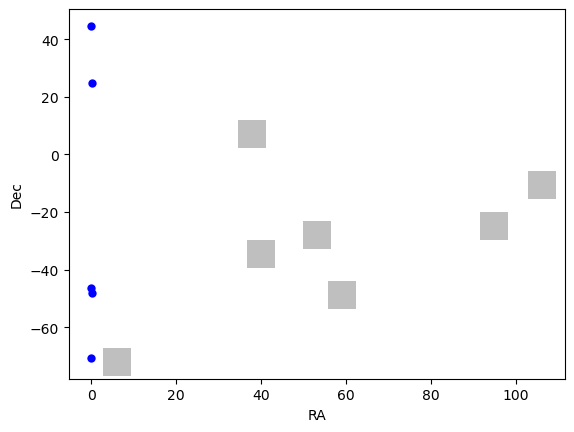

In [9]:
snames = ['47Tuc', 'LowEclLat', 'Fornax', 'ECDFS',
         'EDFS', 'LowGalLat', 'Seagull']
ras = [6.02, 37.86, 40.00, 53.13, 59.10, 95.00, 106.23]
decs = [-72.08, 6.98, -34.45, -28.10, -48.73, -25.00, -10.51]

plt.plot(ras, decs, 's', ms=20, mew=0, alpha=0.5, color='grey')
plt.plot(ut1['catWISE_RA'], ut1['catWISE_Dec'], 'o', mew=0, alpha=1, color='blue')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()